# **Anime Recommendation System**

*Imagine you want to recommend anime similar to "Attack on Titan." You have a list of other anime and their genres. How do you determine which are most similar?*

Cosine similarity comes in! It treats each anime's genre information as a point in space. "Attack on Titan" is one point, and every other anime is another point. Cosine similarity measures the angle between the "Attack on Titan" point and every other point.

**Small angle (close to 0 degrees) -> points are close together -> anime are similar. Large angle (close to 180 degrees) -> points are far apart -> anime are dissimilar.**

*So, cosine similarity helps you find anime that are "close" to "Attack on Titan" in terms of their genres, allowing you to make relevant recommendations.*

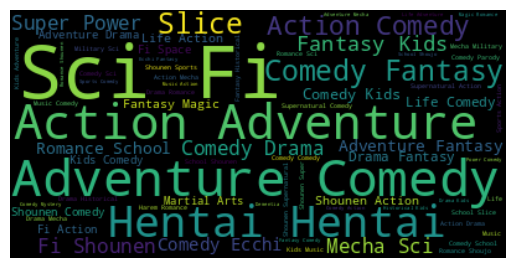

In [ ]:
from wordcloud import WordCloud
text = " ".join(genre for genre in anime['genre'])
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Exploratory Data Analysis For The Dataset

In [ ]:
!pip install fuzzywuzzy

In [ ]:
import pandas as pd
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import random
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from fuzzywuzzy import fuzz

nltk.download('stopwords')

# Load the dataset
anime = pd.read_csv('/content/drive/MyDrive/Datasets/Anime(MAL)/anime.csv')

/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Preprocessing

**Dataset**

In [ ]:
anime.head()

# Basic cleaning
anime.dropna(subset=['genre', 'rating'], inplace=True)
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [ ]:
# Display the first few rows to inspect the columns
print(anime.head())

# Check if 'genre' column exists
if 'genre' not in anime.columns:
    raise KeyError("The dataset does not contain the required 'genre' column.")

# Fill missing values in 'genre' with empty strings
anime['genre'] = anime['genre'].fillna('')

# Combine title and genre for feature extraction
anime['features'] = anime['name'] + " " + anime['genre']

# Display the first few rows of the combined features
print(anime['features'].head())

   anime_id                              name  \
0     32281                    Kimi no Na wa.   
1      5114  Fullmetal Alchemist: Brotherhood   
2     28977                          Gintama°   
3      9253                       Steins;Gate   
4      9969                     Gintama&#039;   

                                               genre   type episodes  rating  \
0               Drama, Romance, School, Supernatural  Movie        1    9.37   
1  Action, Adventure, Drama, Fantasy, Magic, Mili...     TV       64    9.26   
2  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.25   
3                                   Sci-Fi, Thriller     TV       24    9.17   
4  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.16   

   members  
0   200630  
1   793665  
2   114262  
3   673572  
4   151266  
0    Kimi no Na wa. Drama, Romance, School, Superna...
1    Fullmetal Alchemist: Brotherhood Action, Adven...
2    Gintama° Action, Comedy, Histor

# Data Visualisation

***Anime rating frequency***


*This code helps you visualize how the anime ratings are distributed in your dataset, providing insights into the common rating ranges and the overall pattern of ratings. Execute the code yourself to see the output.*

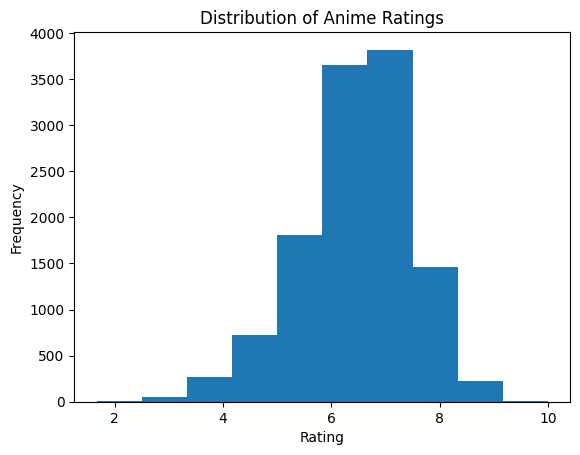

In [ ]:
plt.hist(anime['rating'])
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Anime Ratings')
plt.show()

***Genre Distribution Graph***

This code creates a large horizontal bar chart showing the frequency of each genre in the anime dataset.

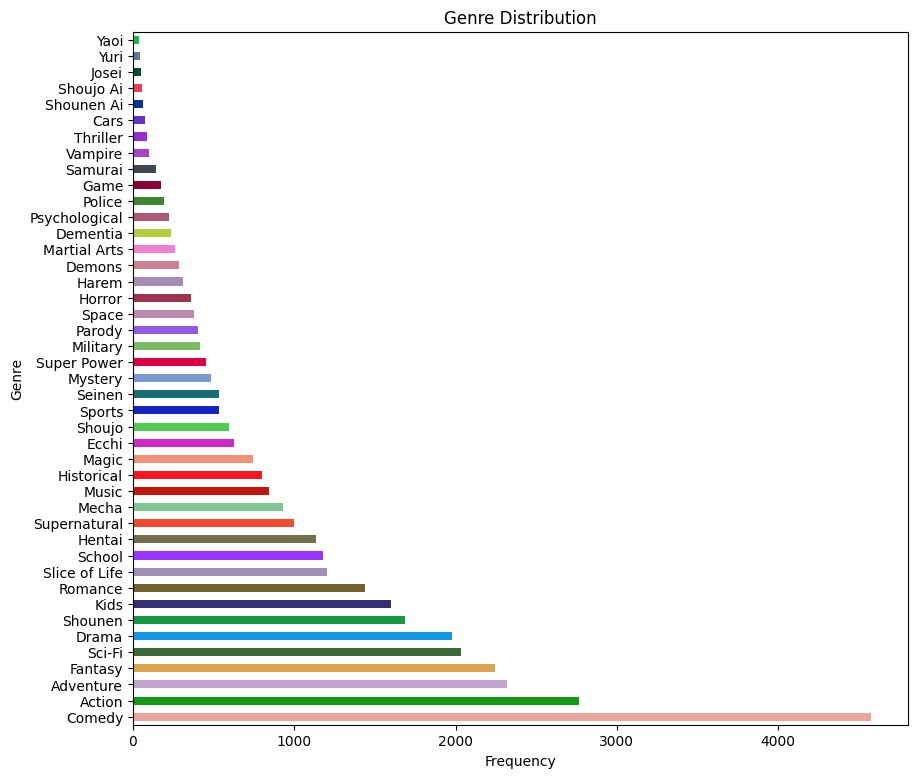

In [ ]:
# Assuming 'anime' is your DataFrame with anime data
plt.figure(figsize=(10, 9))
genre_counts = anime['genre'].str.split(',').explode().str.strip().value_counts()

# Generate random colors for each bar
colors = [
    '#' + ''.join([random.choice('0123456789ABCDEF') for j in range(6)])
    for i in range(len(genre_counts))
]

genre_counts.plot(kind='barh', color=colors)  # Use barh for horizontal bars and set colors
plt.ylabel('Genre')  # Swap x and y labels
plt.xlabel('Frequency')
plt.title('Genre Distribution')
plt.show()

***Popularity vs. Rating***

This code creates a scatter plot to visualize the relationship between the number of members and the rating of each anime.

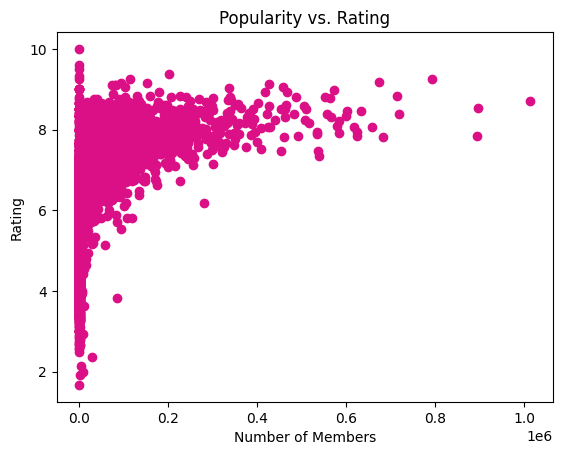

In [ ]:
color = '#' + ''.join([random.choice('0123456789ABCDEF') for j in range(6)])

plt.scatter(anime['members'], anime['rating'], c=color)  # Set the color for all points
plt.xlabel('Number of Members')
plt.ylabel('Rating')
plt.title('Popularity vs. Rating')
plt.show()

***Heatmap***

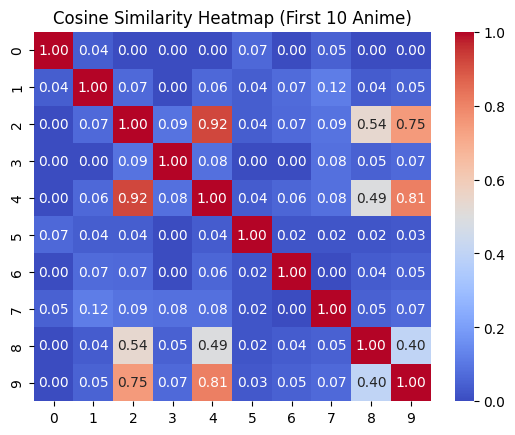

In [ ]:
sns.heatmap(cosine_sim[:10,:10], cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Cosine Similarity Heatmap (First 10 Anime)')
plt.show()

This code prepares the anime data for analysis by checking for a 'genre' column, filling any missing genres, and combining the anime name and genre into a new 'features' column for use in tasks like recommendation systems.

# Using Cosine_similarity

Cosine similarity is a way to measure how similar two things are. Imagine you have two lists of numbers representing characteristics of two objects (like the genres of two anime). Cosine similarity calculates the angle between these two lists when they are treated as vectors in a multi-dimensional space.

1.  **A small angle (closer to 0 degrees) means the vectors are pointing in a similar direction, indicating high similarity.** The cosine of 0 degrees is
2.  **A large angle (closer to 180 degrees) means the vectors are pointing in opposite directions, indicating low similarity.** The cosine of 180 degrees is -1.


are pointing in a similar direction, indicating high similarity. The cosine of 0 degrees is 1.
A large angle (closer to 180 degrees) means the vectors are pointing in opposite directions, indicating low similarity. The cosine of 180 degrees is -1.
In the context of your anime recommendation system, cosine similarity is used to determine how similar two anime are based on their combined title and genre information. The higher the cosine similarity score, the more likely it is that a user who enjoys one anime would also enjoy the other.

This code takes the anime titles and genres, converts them into numerical representations using TF-IDF, and then calculates the similarity between each pair of anime using cosine similarity. This similarity matrix is used later to recommend similar anime.

In [ ]:
# TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words=stopwords.words('english'))
tfidf_matrix = tfidf.fit_transform(anime['features'])

# Compute the cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

*After the anime titles and genres are converted into numerical vectors (using TF-IDF), cosine_sim calculates a similarity score between every pair of anime. This score, ranging from -1 to 1, indicates how similar two anime are based on their titles and genres. A higher score means they are more similar. This information is used later for recommending anime that are similar to a user's choice.*

#Recommendation Functions

Different recommendation functions are presented here.

**Recommend By Name Search**

In [ ]:
def get_recommendations(cosine_sim=cosine_sim):
    title = input("Enter anime title: ")

    # Fuzzy matching to find closest title
    best_match = None
    best_ratio = 0
    for existing_title in anime['name'].values:
        ratio = fuzz.ratio(title.lower(), existing_title.lower())
        if ratio > best_ratio:
            best_ratio = ratio
            best_match = existing_title

    if best_ratio < 60: # Threshold for a reasonable match
        raise ValueError("No close matches found in the dataset.")

    idx = anime[anime['name'] == best_match].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  # Get top 10 recommendations
    anime_indices = [i[0] for i in sim_scores]
    recommendations = anime[['name', 'genre','type']].iloc[anime_indices]
    return recommendations

**Function Driving Code For Name Search**

In [ ]:
try:
    recommendations = get_recommendations()
    display(recommendations)

    # Introduce a delay before asking for feedback
    import time
    time.sleep(5)  # Wait for 5 seconds

    # Collect user feedback
    feedback = input("Are these recommendations relevant? (yes/no): ")
    if feedback.lower() == 'no':
        reason = input("Why not? (too broad, not similar, other): ")
        # Store the feedback (you'll need a way to persist this data)
        print("Thank you for your feedback!")
    else:
        print("Thank you for your feedback!")

except ValueError as e:
    print(e)

Enter anime title: MSekr


,name,genre,type
4077,Monster Extra,"Drama, Horror, Mystery, Seinen",Special
5382,AD Police,"Adventure, Dementia, Mecha, Mystery, Police, P...",OVA
365,Paprika,"Fantasy, Horror, Mystery, Psychological, Sci-F...",Movie
5297,Sanctuary,"Action, Drama, Police, Seinen, Thriller",OVA
40,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV
981,Mousou Dairinin,"Drama, Mystery, Police, Psychological, Superna...",TV
702,Another,"Horror, Mystery, School, Supernatural, Thriller",TV
449,Tokyo Ghoul,"Action, Drama, Horror, Mystery, Psychological,...",TV
1518,Tokyo Ghoul √A,"Action, Drama, Horror, Mystery, Psychological,...",TV
778,Death Note Rewrite,"Mystery, Police, Psychological, Supernatural, ...",Special


Are these recommendations relevant? (yes/no): yes
Thank you for your feedback!


**Recommend by Popularity and Rating**

This function recommends top anime according to its popularity and rating.

In [ ]:
def get_recommendations_by_popularity_and_rating():
    # Calculate a weighted score based on rating and members
    anime['popularity_score'] = anime['rating'] * anime['members']

    # Sort by the popularity score and get the top 10
    recommendations = anime.sort_values('popularity_score', ascending=False).head(10)

    return recommendations[['name', 'type', 'genre', 'rating', 'members']]

# Get and display recommendations
recommendations = get_recommendations_by_popularity_and_rating()
display(recommendations)

,name,type,genre,rating,members
40,Death Note,TV,"Mystery, Police, Psychological, Supernatural, ...",8.71,1013917
86,Shingeki no Kyojin,TV,"Action, Drama, Fantasy, Shounen, Super Power",8.54,896229
1,Fullmetal Alchemist: Brotherhood,TV,"Action, Adventure, Drama, Fantasy, Magic, Mili...",9.26,793665
804,Sword Art Online,TV,"Action, Adventure, Fantasy, Game, Romance",7.83,893100
19,Code Geass: Hangyaku no Lelouch,TV,"Action, Mecha, Military, School, Sci-Fi, Super...",8.83,715151
3,Steins;Gate,TV,"Sci-Fi, Thriller",9.17,673572
159,Angel Beats!,TV,"Action, Comedy, Drama, School, Supernatural",8.39,717796
131,Toradora!,TV,"Comedy, Romance, School, Slice of Life",8.45,633817
841,Naruto,TV,"Action, Comedy, Martial Arts, Shounen, Super P...",7.81,683297
445,Mirai Nikki (TV),TV,"Action, Mystery, Psychological, Shounen, Super...",8.07,657190


**Top Recommendations By Genre**

In [ ]:
def get_recommendations_genre(cosine_sim=cosine_sim):
    title = input("Enter anime genre: ")

    # Fuzzy matching to find closest title
    best_match = None
    best_ratio = 0
    for existing_title in anime['genre'].values: # Iterate over titles
        ratio = fuzz.ratio(title.lower(), existing_title.lower())
        if ratio > best_ratio:
            best_ratio = ratio
            best_match = existing_title

    if best_ratio < 60: # Threshold for a reasonable match
        raise ValueError("No close matches found in the dataset.")

    # Find index of the best match in the 'name' column (not 'genre')
    idx = anime[anime['genre'] == best_match].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  # Get top 10 recommendations
    anime_indices = [i[0] for i in sim_scores]
    recommendations = anime[['name', 'genre','type']].iloc[anime_indices]
    return recommendations

In [ ]:
# Call the function to get recommendations
recommendations = get_recommendations_genre()
recommendations

Enter anime genre: fantasy


,name,genre,type
6577,G-9,Fantasy,OVA
6095,Final Fantasy,"Action, Adventure, Comedy, Fantasy",OVA
7097,White Fantasy,"Fantasy, Sports",Special
11150,Kyonyuu Fantasy,"Demons, Fantasy, Harem, Hentai, Supernatural",OVA
5974,Final Fantasy: Unlimited,"Action, Adventure, Fantasy, Sci-Fi, Shounen",TV
7653,Sakura,Fantasy,Movie
8750,Hana to Shounen,Fantasy,OVA
8840,Hello Kitty: Ringo no Mori no Fantasy,"Comedy, Fantasy, Kids",TV
1834,Pokemon,"Action, Adventure, Comedy, Fantasy, Kids",TV
10320,Sora e,"Fantasy, Kids, Music",Music


**Random Recommendations By Genre**

In [ ]:
# Assuming 'anime' is your DataFrame with anime data
def get_random_recommendations_by_genre(genre, num_recommendations=10):
  # Filter anime by the given genre
  anime_in_genre = anime[anime['genre'].str.contains(genre, case=False)]

  # Check if any anime are found in the genre
  if anime_in_genre.empty:
    return "No anime found in the specified genre."

  # Generate random recommendations within the genre
  random_indices = random.sample(range(len(anime_in_genre)), min(num_recommendations, len(anime_in_genre)))
  recommendations = anime_in_genre.iloc[random_indices][['name', 'genre', 'type']]
  return recommendations

# Example usage:
genre_input = input("Enter a genre: ")
random_recs = get_random_recommendations_by_genre(genre_input, num_recommendations=5)
random_recs

Enter a genre: Action


,name,genre,type
3271,Shin Hokuto no Ken,"Action, Martial Arts, Sci-Fi, Shounen",OVA
6957,Tokiwa Kitareri!!,"Action, Magic, Shounen",Special
10434,Super Majingga 3,"Action, Mecha, Sci-Fi, Space",Movie
24,Mononoke Hime,"Action, Adventure, Fantasy",Movie
5899,Kodai Ouja Kyouryuu King: Yokuryuu Densetsu,"Action, Adventure, Game, Kids, Sci-Fi",TV


The code prompts the user to enter an anime title.
It then uses the trained KNN model to find anime with similar genres to the user's input.
Finally, it presents a list of recommended anime titles, along with their genres and types, directly to the user.

In [ ]:
from sklearn.neighbors import NearestNeighbors

# Fit KNN model on the cosine similarity matrix
knn = NearestNeighbors(metric='cosine', algorithm='brute')
knn.fit(cosine_sim)

def get_recommendations_knn(title, k=10):
    # Fuzzy matching to find closest title
    best_match = None
    best_ratio = 0
    for existing_title in anime['name'].values:
        ratio = fuzz.ratio(title.lower(), existing_title.lower())
        if ratio > best_ratio:
            best_ratio = ratio
            best_match = existing_title

    if best_ratio < 60:
        raise ValueError("No close matches found in the dataset.")

    idx = anime[anime['name'] == best_match].index[0]
    distances, indices = knn.kneighbors(cosine_sim[idx].reshape(1, -1), n_neighbors=k+1)

    # Exclude the first index (itself)
    recommendations_indices = indices.flatten()[1:]
    recommendations = anime[['name', 'genre', 'type']].iloc[recommendations_indices]
    return recommendations

# Get user input
title_input = input("Enter anime title: ")

# Get recommendations
try:
    recommendations = get_recommendations_knn(title_input)
    print(recommendations)
except ValueError as e:
    e

Enter anime title: Pokemon
                                    name  \
616                  Pokemon: The Origin   
1508                          Pokemon XY   
2656         Pokemon Advanced Generation   
4213                Pokemon Best Wishes!   
1067          Pokemon XY: Mega Evolution   
666                     Pokemon XY&amp;Z   
3454                 Pokemon Housoukyoku   
5072        Pokemon XY SP: Road to Kalos   
1147        Pokemon: Mewtwo no Gyakushuu   
2807  Pokemon: Kesshoutou no Teiou Entei   

                                                genre     type  
616          Action, Adventure, Comedy, Fantasy, Kids  Special  
1508         Action, Adventure, Comedy, Fantasy, Kids       TV  
2656         Action, Adventure, Comedy, Fantasy, Kids       TV  
4213         Action, Adventure, Comedy, Fantasy, Kids       TV  
1067         Action, Adventure, Comedy, Fantasy, Kids  Special  
666          Action, Adventure, Comedy, Fantasy, Kids       TV  
3454                 Adventure, C